In [1]:
import nibabel
import nilearn
from nilearn import plotting

import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize
import pandas as pd

%matplotlib inline

## Loading mask

In [95]:
tensors_mask = np.load('mask_for_0_1.npy')

In [96]:
m_mask = tensors_mask[0][0] #> 1e-3

In [97]:
f_mask = tensors_mask[1][0] #> 1e-3

In [79]:
tensors = np.load('tensors.npy')

In [80]:
m_tensor = tensors[0]
f_tensor = tensors[1]

In [81]:
roi_img = nibabel.Nifti1Image(m_mask, affine=np.eye(4))
bim_img  = nibabel.Nifti1Image(m_tensor, affine=np.eye(4))

HeaderDataError: data dtype "bool" not supported

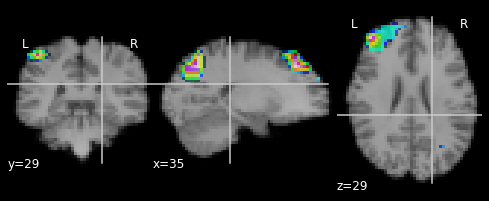

In [8]:
plotting.plot_roi(roi_img,bim_img,cut_coords=(35,29,29))
plotting.show()

## Function for region importance

In [98]:
def get_regions_from_mask(mask, atlas_name='icbm', nb_best_regions=5,  verbose=False):
    if atlas_name == 'icbm':
        atlas = nibabel.Nifti1Image.from_filename('icbm/ICBM_WMPM.nii', mmap=False)
        atlas_data = atlas.get_fdata()
        labels = np.unique(atlas_data)
        nb_of_labels = len(labels)-1
        with open('icbm/LabelLookupTable.txt') as f:
            file = f.read()
        label_names = [None]*50
        for line in file.split('\n'):
            items = line.split('\t')
            if len(items) == 1:
                continue
            nb = int(items[0])
            region_name = items[-1]
            label_names[nb-1] = region_name
        label_names[-1] = 'Tapatum right'
    elif atlas_name == 'brainnet':
        atlas = nibabel.Nifti1Image.from_filename('brainnettome/BN_Atlas_246_1mm.nii.gz', mmap=False)
        atlas_data = atlas.get_fdata()
        labels = np.unique(atlas_data)
        nb_of_labels = len(labels)-1
        with open('brainnettome/BN_Atlas_246.txt') as f:
            file = f.read()
        label_names = file.split()
        
    resized_mask = resize(mask, atlas_data.shape)
    scores = [None]*nb_of_labels
    for i in range(1, nb_of_labels+1):
        region = atlas_data == i
        score = np.sum(resized_mask * region) / np.sum(region)
        scores[i-1] = score
        if verbose:
            print('{:>35} {:>10.2f}'.format(label_names[i-1][:30], score))
            
    scores = np.array(scores)
    scores = scores / np.sum(scores) #normalizing
    np_labels = np.array(label_names)
    

    return np_labels, scores

## ICBM

In [99]:
icbm_labels, m_icbm_scores = get_regions_from_mask(m_mask)


In [100]:
icbm_labels, f_icbm_scores = get_regions_from_mask(f_mask)


In [125]:
df_icbm = pd.DataFrame()

df_icbm['Regions'] = icbm_labels

df_icbm['Male score'] = m_icbm_scores

df_icbm['Female score'] = f_icbm_scores

#df_icbm.to_csv('icbm.csv')

df_icbm

,Regions,Male score,Female score
0,Middle cerebellar peduncle,1.416969e-01,0.026889
1,Pontine crossing tract (a part of MCP),8.555487e-06,0.035777
2,Genu of corpus callosum,5.603180e-02,0.024432
3,Body of corpus callosum,6.533961e-02,0.004626
4,Splenium of corpus callosum,3.806429e-03,0.021211
5,Fornix (column and body of fornix),3.504896e-04,0.006120
6,Corticospinal tract left,1.407202e-04,0.044583
7,Corticospinal tract right,5.377615e-05,0.050084
8,Medial lemniscus left,4.451830e-05,0.018104
9,Medial lemniscus right,1.382992e-05,0.037075


In [101]:
nb_best_regions = 5

In [102]:
best_scores =  np.argsort(m_icbm_scores)[::-1]
print('ICBM score, white-matter, male')
for i in range(nb_best_regions):
    print('{:<85} {:<10.4f}'.format(icbm_labels[best_scores[i]], m_icbm_scores[best_scores[i]])) 
print('')
best_scores =  np.argsort(f_icbm_scores)[::-1]
print('ICBM score, white-matter, female')
for i in range(nb_best_regions):
    print('{:<85} {:<10.4f}'.format(icbm_labels[best_scores[i]], f_icbm_scores[best_scores[i]])) 

ICBM score, white-matter, male
Cingulum (cingulate gyrus) left                                                       0.1778    
Middle cerebellar peduncle                                                            0.1417    
Anterior corona radiata left                                                          0.1173    
Posterior thalamic radiation (include optic radiation) right                          0.1036    
Uncinate fasciculus left                                                              0.0891    

ICBM score, white-matter, female
Corticospinal tract right                                                             0.0501    
Fornix (cres) / Stria terminalis (can not be resolved with current resolution) left   0.0453    
Corticospinal tract left                                                              0.0446    
Cerebral peduncle left                                                                0.0430    
Inferior fronto-occipital fasciculus left ?                   

In [103]:
best_scores =  np.argsort(m_icbm_scores)[::-1]
print('ICBM score, white-matter, male')
for i in range(nb_best_regions):
    print('{:<85} {:<10.4f}'.format(icbm_labels[best_scores[i]], m_icbm_scores[best_scores[i]])) 
print('')
best_scores =  np.argsort(f_icbm_scores)[::-1]
print('ICBM score, white-matter, female')
for i in range(nb_best_regions):
    print('{:<85} {:<10.4f}'.format(icbm_labels[best_scores[i]], f_icbm_scores[best_scores[i]])) 

ICBM score, white-matter, male
Cingulum (cingulate gyrus) left                                                       0.1778    
Middle cerebellar peduncle                                                            0.1417    
Anterior corona radiata left                                                          0.1173    
Posterior thalamic radiation (include optic radiation) right                          0.1036    
Uncinate fasciculus left                                                              0.0891    

ICBM score, white-matter, female
Corticospinal tract right                                                             0.0501    
Fornix (cres) / Stria terminalis (can not be resolved with current resolution) left   0.0453    
Corticospinal tract left                                                              0.0446    
Cerebral peduncle left                                                                0.0430    
Inferior fronto-occipital fasciculus left ?                   

## Brainnettome

In [67]:
brainnettome_labels, m_brainnettome_scores = get_regions_from_mask(m_mask, atlas_name='brainnet')

In [68]:
brainnettome_labels, f_brainnettome_scores = get_regions_from_mask(f_mask, atlas_name='brainnet')

In [61]:
df_brainnettome = pd.DataFrame()

In [69]:
df_brainnettome['regions'] = brainnettome_labels

df_brainnettome['Male score'] = m_brainnettome_scores

df_brainnettome['Female score'] = f_brainnettome_scores

#df_brainnettome.to_csv('brainnettome.csv')

df_brainnettome

,regions,Male score,Female score
0,SFG_L_7_1,1.158677e-03,0.002950
1,SFG_R_7_1,4.799185e-04,0.001450
2,SFG_L_7_2,1.931305e-02,0.000172
3,SFG_R_7_2,1.812711e-02,0.000005
4,SFG_L_7_3,1.675928e-02,0.000385
...,...,...,...
241,Tha_R_8_6,8.813489e-07,0.006308
242,Tha_L_8_7,8.382136e-08,0.001222
243,Tha_R_8_7,1.959516e-06,0.002605
244,Tha_L_8_8,7.872384e-07,0.003234


In [75]:
best_scores =  np.argsort(m_brainnettome_scores)[::-1]
print('Brainnettome score, gray-matter, male')
for i in range(nb_best_regions):
    print('{:<20} {:<10.4f}'.format(brainnettome_labels[best_scores[i]], m_brainnettome_scores[best_scores[i]])) 

print('')

best_scores =  np.argsort(f_brainnettome_scores)[::-1]
print('Brainnettome score, gray-matter, female')
for i in range(nb_best_regions):
    print('{:<20} {:<10.4f}'.format(brainnettome_labels[best_scores[i]], f_brainnettome_scores[best_scores[i]])) 

Brainnettome score, gray-matter, male
SPL_R_5_5            0.0415    
MFG_R_7_1            0.0403    
IPL_R_6_2            0.0398    
SPL_R_5_1            0.0319    
SPL_R_5_2            0.0301    

Brainnettome score, gray-matter, female
PhG_R_6_1            0.0158    
PhG_R_6_4            0.0156    
Hipp_R_2_1           0.0149    
Amyg_R_2_1           0.0148    
PhG_R_6_5            0.0144    
